In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('complete_dataset.csv')
df.head()

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [6]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [7]:
bangalore_population.to_csv('population_dataset.csv')

In [8]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [9]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [10]:
bangalore_income.to_csv('income_dataset.csv')

In [11]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.9623396203125 77.601752946875


In [12]:
CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH'
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG'
VERSION = '20180606'
LIMIT = 150

In [13]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [14]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [15]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [16]:
borough_colors

{'Central': '#BAC77A',
 'Eastern': '#7016D8',
 'NorthEastern': '#A6A638',
 'Northern': '#C31C30',
 'SouthEastern': '#58A47E',
 'Southern': '#0BFC50',
 'SouthernSuburbs': '#83308C',
 'Western': '#D2DEC1'}

In [17]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [18]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)
    
bangalore_map

In [19]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [20]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [21]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  611


In [22]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
2,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
3,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [23]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       112
Fast Food Restaurant     32
Café                     32
Bakery                   28
Department Store         24
Ice Cream Shop           21
Pizza Place              20
Coffee Shop              15
Chinese Restaurant       13
Clothing Store           13
Name: Neighborhood, dtype: int64

In [24]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  133


In [25]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [26]:
individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area             5
        Domlur                     13
        Indiranagar                63
        Jeevanbheemanagar           5
        Malleswaram                 6
...                               ...
Western Nagarbhavi                  7
        Nandini Layout              1
        Nayandahalli                5
        Rajarajeshwari Nagar        7
        Vijayanagar                 5

[61 rows x 1 columns]

In [27]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [28]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [29]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,13
2,Central,Indiranagar,63
3,Central,Jeevanbheemanagar,5
4,Central,Malleswaram,6
...,...,...,...
56,Western,Nagarbhavi,7
57,Western,Nandini Layout,1
58,Western,Nayandahalli,5
59,Western,Rajarajeshwari Nagar,7


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Electronic City'),
 Text(0, 0, 'HSR Lay

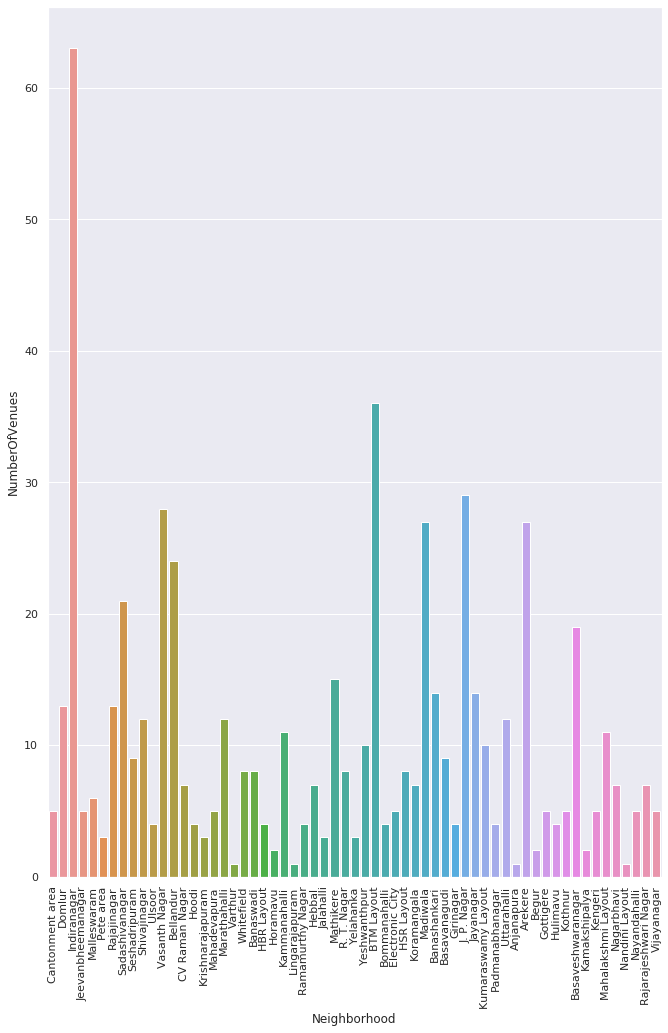

In [30]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

In [31]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
238,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
239,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
240,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
241,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
242,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
243,Whitefield,Eastern,12.9698,77.7499,Glen's Bakehouse,12.967490,77.749565,Bakery
244,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
245,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [32]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Arekere,0.0,0.000000,0.0,0.000000,0.0,0.0,0.037037,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,BTM Layout,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.055556,0.0,0.0,0.0,0.0
3,Banashankari,0.0,0.071429,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Banaswadi,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.125000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Vasanth Nagar,0.0,0.000000,0.0,0.035714,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.035714,0.0,0.0,0.0,0.0
57,Vijayanagar,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
58,Whitefield,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
59,Yelahanka,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [34]:
number_of_top_venues = 5

In [35]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                          Venue  Frequency
0            Venue Category_ATM        1.0
1  Venue Category_Movie Theater        0.0
2     Venue Category_Playground        0.0
3    Venue Category_Pizza Place        0.0
4       Venue Category_Pharmacy        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.19
1     Venue Category_Department Store       0.15
2  Venue Category_Sporting Goods Shop       0.15
3          Venue Category_Pizza Place       0.07
4          Venue Category_Supermarket       0.04


--------- BTM Layout ---------
                              Venue  Frequency
0  Venue Category_Indian Restaurant       0.22
1        Venue Category_Snack Place       0.08
2     Venue Category_Ice Cream Shop       0.08
3        Venue Category_Pizza Place       0.06
4     Venue Category_Sandwich Place       0.06


--------- Banashankari ---------
                              Venue  

In [36]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [37]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Food Truck,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Bar,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Neighborhood
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Sandwich Place,Venue Category_Chinese Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Gym
3,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Pizza Place
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Convenience Store,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Kerala Restaurant,Venue Category_Grocery Store,Venue Category_Café,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop


In [38]:
neighborhoods_venues_sorted.shape

(61, 11)

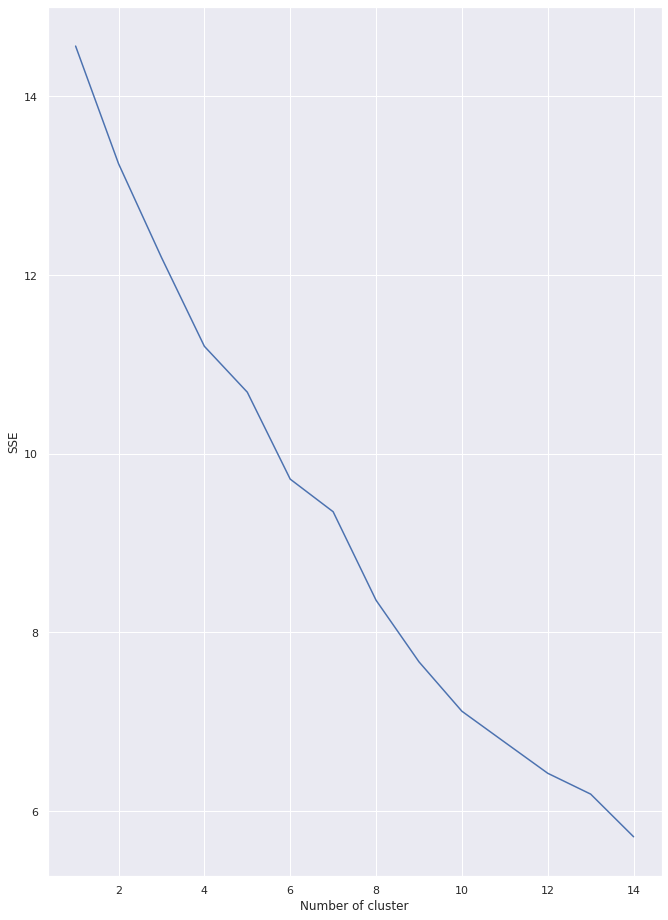

In [39]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [40]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [41]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [42]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [43]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    15
1     4
2     7
3    32
4     3
Name: Neighborhood, dtype: int64

In [44]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Accessories Store', 'Venue Category_Andhra Restaurant',
       'Venue Category_Art Museum', 'Venue Category_Arts & Crafts Store',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage', 'Venue Category_BBQ Joint',
       ...
       'Venue Category_Toll Plaza', 'Venue Category_Train Station',
       'Venue Category_Travel & Transport', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Wine Bar',
       'Venue Category_Women's Store', 'Venue Category_Yoga Studio',
       'Cluster'],
      dtype='object', length=135)

In [45]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [46]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Food Truck,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Bar,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Sandwich Place,Venue Category_Chinese Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Fast Food Restaurant,...,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,3
3,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0


In [47]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [48]:
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [51]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

In [52]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [53]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [54]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [55]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [56]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,...,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [57]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,Banashankari,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
     ..
56    1
57    0
58    0
59    0
60    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 61, dtype: uint8

In [59]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [60]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [61]:
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [62]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [63]:
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [64]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [65]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [66]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,590,Whitefield,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,...,0.0,0.0,0,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,591,Whitefield,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,...,0.0,0.0,0,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,592,Whitefield,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,...,0.0,0.0,0,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,593,Whitefield,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,...,0.0,0.0,0,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,594,Whitefield,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,...,0.0,0.0,0,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,595,Whitefield,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,...,0.0,0.0,0,Eastern,12.9698,77.7499,Glen's Bakehouse,12.967490,77.749565,Bakery
6,596,Whitefield,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,...,0.0,0.0,0,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
7,597,Whitefield,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Café,Venue Category_Gym / Fitness Center,Venue Category_Electronics Store,...,0.0,0.0,0,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [67]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

#### target_cluster

In [69]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
64,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,...,0.0,0.0,0,Southern,12.9255,77.5468,Anna Kuteera,12.926094,77.550367,Indian Restaurant
65,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,...,0.0,0.0,0,Southern,12.9255,77.5468,cafe coffee day,12.924896,77.545873,Café
66,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,...,0.0,0.0,0,Southern,12.9255,77.5468,Pizza Hut,12.924959,77.550755,Pizza Place
67,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,...,0.0,0.0,0,Southern,12.9255,77.5468,Taaza tindi,12.926047,77.548575,Breakfast Spot
68,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,...,0.0,0.0,0,Southern,12.9255,77.5468,Chicken Hunt,12.926350,77.548533,Fried Chicken Joint


In [70]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 215 neighborhoods which has similar characteristics to Whitefield.


In [71]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,64,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,...,0.0,0.0,0,Southern,12.9255,77.5468,Anna Kuteera,12.926094,77.550367,Indian Restaurant
1,65,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,...,0.0,0.0,0,Southern,12.9255,77.5468,cafe coffee day,12.924896,77.545873,Café
2,66,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,...,0.0,0.0,0,Southern,12.9255,77.5468,Pizza Hut,12.924959,77.550755,Pizza Place
3,67,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,...,0.0,0.0,0,Southern,12.9255,77.5468,Taaza tindi,12.926047,77.548575,Breakfast Spot
4,68,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,...,0.0,0.0,0,Southern,12.9255,77.5468,Chicken Hunt,12.926350,77.548533,Fried Chicken Joint


In [72]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [73]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [74]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,...,Anna Kuteera,12.926094,77.550367,Indian Restaurant,810407,0.823908,57524.209528,0.889855,0,1.0
1,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,...,cafe coffee day,12.924896,77.545873,Café,810407,0.823908,57524.209528,0.889855,0,1.0
2,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,...,Pizza Hut,12.924959,77.550755,Pizza Place,810407,0.823908,57524.209528,0.889855,0,1.0
3,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,...,Taaza tindi,12.926047,77.548575,Breakfast Spot,810407,0.823908,57524.209528,0.889855,0,1.0
4,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Fast Food Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,...,Chicken Hunt,12.926350,77.548533,Fried Chicken Joint,810407,0.823908,57524.209528,0.889855,0,1.0


In [75]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [76]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Falafel Restaurant,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,13.006615,77.564158,Indian Restaurant,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674
1,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Falafel Restaurant,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,13.007388,77.563982,Ice Cream Shop,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674
2,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Falafel Restaurant,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,13.001860,77.567340,Ice Cream Shop,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674
3,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Falafel Restaurant,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,13.007511,77.563738,Bakery,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674
4,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Falafel Restaurant,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,13.006587,77.564354,Ice Cream Shop,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674


In [77]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [78]:
top3_df = pd.DataFrame(top3).reset_index()

In [79]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Banashankari,Venue Category_Clothing Store,Venue Category_Indian Restaurant,Venue Category_Café,[0.8234029969357849]
1,Basaveshwaranagar,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,[0.6426377807870477]
2,Bellandur,Venue Category_Fast Food Restaurant,Venue Category_Kerala Restaurant,Venue Category_Indian Restaurant,[0.24491290943915342]
